In [14]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Get the path to the CSV file.
csv_path = '/content/drive/My Drive/Dataset/Housing 1.csv'

# Load the data from the CSV file into a NumPy array.
data = np.genfromtxt(csv_path, delimiter=',')

In [41]:
y_train = data[:, 0]
x_train = data[:, 1:5]

y_min = np.min(y_train)
y_max = np.max(y_train)

n = x_train.shape[1]

x_min = np.zeros(n)
x_max = np.zeros(n)

for i in range(n):
  x_min[i] = np.min(x_train[i])
  x_max[i] = np.max(x_train[i])

# Normalize y_train and x_train between 0 and 1
y_train = (y_train - y_min) / (y_max - y_min)
for i in range(n):
  x_train[:, i] = (x_train[:, i] - x_min[i]) / (x_max[i] - x_min[i])

# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  1.33368898e-04]
 [ 1.20760313e+00  0.00000000e+00  2.00843543e-04  2.66737797e-04]
 [ 1.34241035e+00 -1.11656990e-04  0.00000000e+00  0.00000000e+00]
 [ 1.01078458e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00 -1.00421771e-04  0.00000000e+00]]
Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [1.         0.90909091 0.90909091 0.90606061 0.83636364]


In [32]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)

The shape of x_train is: (545, 4)
The shape of y_train is:  (545,)


Text(0, 0.5, 'Price')

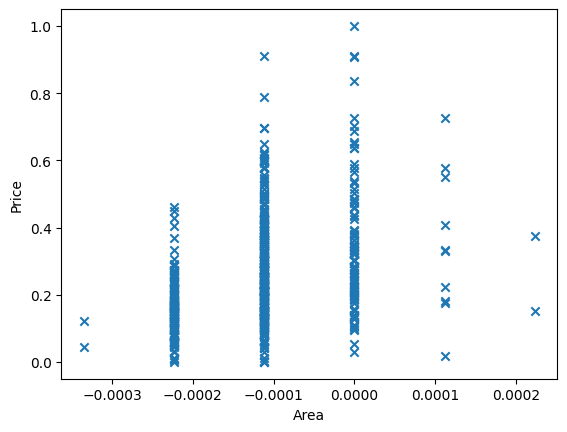

In [49]:
# Scatter plot
plt.scatter(x_train[:,1], y_train, marker='x')
plt.xlabel('Area')
plt.ylabel('Price')

In [50]:
# Cost function
def compute_cost(x,y,w,b):
  m=x.shape[0]
  total_cost=0

  for i in range(m):
    f_wb = np.dot(x[i], w)+b
    cost = (f_wb - y[i])**2
    total_cost += cost
  total_cost = total_cost/(2*m)
  return total_cost

In [51]:
# Compute cost with some initial values
initial_w = np.zeros(n)
initial_b = 5

cost = compute_cost(x_train, y_train, initial_w, initial_b)
cost

11.241255044891409

In [52]:
# gradient decent
def compute_gradient(x,y,w,b):
  m=x.shape[0]
  dj_w = 0
  dj_b = 0

  for i in range(m):
    f_wb = np.dot(x[i], w)+b
    dj_w_i=(f_wb-y[i])*x[i]
    dj_b_i=(f_wb-y[i])
    dj_w+=dj_w_i
    dj_b+=dj_b_i
  dj_w/=m
  dj_b/=m
  return dj_w, dj_b

In [53]:
# Execute gradient decent
def gradient_descent(x,y,w_in,b_in,alpha,it):
  m = x.shape[0]

  # An array to store cost J and w's at each iteration — primarily for graphing later
  J_history = []
  w_history = []
  w = w_in
  b = b_in

  for i in range(it):
    dj_w, dj_b = compute_gradient(x,y,w,b)

    w = w-(alpha*dj_w)
    b = b-(alpha*dj_b)


    cost = compute_cost(x,y,w,b)
    J_history.append(cost)


    w_history.append(w)
    if(i%150==0):
      print(f"Iteration {i}: Cost {float(J_history[-1])}  ")

  return w,b,J_history,w_history


In [54]:
initial_w = np.zeros(n)
initial_b = 3.

it = 1500
alpha = 0.5

w,b,_,_ = gradient_descent(x_train,y_train,initial_w,initial_b,alpha,it)

print("w,b found by gradient descent:", w, b)

Iteration 0: Cost 0.33256660843060465  
Iteration 150: Cost 0.009347630484669491  
Iteration 300: Cost 0.009328379620433643  
Iteration 450: Cost 0.00932837045769273  
Iteration 600: Cost 0.009328364819069181  
Iteration 750: Cost 0.00932835918110343  
Iteration 900: Cost 0.009328353543150224  
Iteration 1050: Cost 0.0093283479052094  
Iteration 1200: Cost 0.00932834226728096  
Iteration 1350: Cost 0.009328336629364926  
w,b found by gradient descent: [0.29670348 0.00328876 0.0028198  0.00542368] 0.055259217966475996


Text(0, 0.5, 'Price')

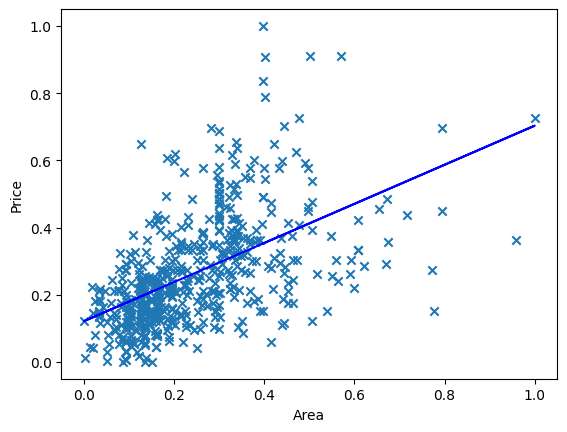

In [25]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
  predicted[i] = w*x_train[i]+b

# linear fit
plt.plot(x_train, predicted, c="b")

plt.scatter(x_train, y_train, marker='x')
plt.xlabel('Area')
plt.ylabel('Price')

In [28]:
def predict(x):
  x = (x-x_min)/(x_max-x_min)
  p = w*x+b
  p = p*(y_max-y_min) + y_min
  return p

In [29]:
pridicted_value = predict(8100)
pridicted_value

6129304.894185356